# Gradient Descent: Step Sizes

## Introduction

In the last section, you took a first look at the process for improving regression lines.  You began with some data then used a simple regression line in the form $\hat{y}= mx + b $ to predict an output, given an input.  Finally, you measured the accuracy of your regression line by calculating the differences between the outputs predicted by the regression line and the actual values. In this lesson, you'll look at how we can make your approach more efficient.

## Objectives

You will be able to:

- Define step sizes in the context of gradient descent

- Define a learning rate, and its relationship to step size when performing gradient descent
- Plot visualizations of the process of gradient descent


## The best fit

In the last lesson, we quantified the accuracy of the regression line by squaring all of the errors (to eliminate negative values) and adding these squares together to get our residual sum of squares (RSS).  Armed with a number that describes the line's accuracy (or goodness of fit), we iteratively tried new regression lines by adjusting our slope value, $m$, and then comparing these RSS values.  By finding the values $m$ and $b$ that minimize the RSS, we can found our "best fit line". For our case, a slope $m$ of 52 gave the best fit line given that the intercept was kept constant.  

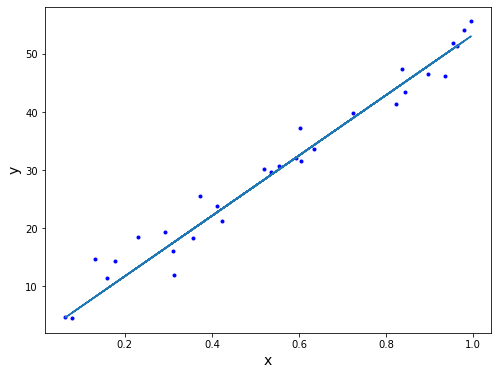

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

def regression_formula(x):
    return 1.319 + 52*x

np.random.seed(225)

x = np.random.rand(30,1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3+ 50* x + y_randterm

plt.figure(figsize=(8,6))
plt.plot(x, y, '.b')
plt.plot(x, regression_formula(x), '-')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

In our cost function below, you can see the sequential values of $m$ and the related RSS values (given a constant value $b$).

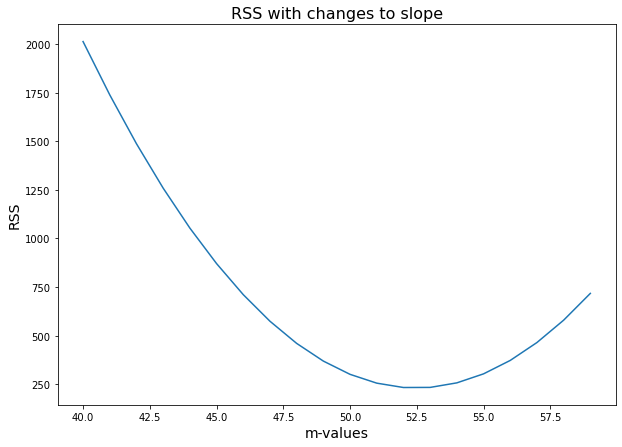

In [2]:
def errors(x_values, y_values, m, b):
    y_line = (b + m*x_values)
    return (y_values - y_line)

def squared_errors(x_values, y_values, m, b):
    return np.round(errors(x_values, y_values, m, b)**2, 2)

def residual_sum_squares(x_values, y_values, m, b):
    return round(sum(squared_errors(x_values, y_values, m, b)), 2)


table = np.zeros((20,2))
for idx, val in enumerate(range(40, 60)):
    table[idx,0] = val
    table[idx,1] = residual_sum_squares(x, y, val, 1.319)
    
plt.figure(figsize=(10,7))
plt.plot(table[:,0], table[:,1], '-')
plt.xlabel("m-values", fontsize=14)
plt.ylabel("RSS", fontsize=14)
plt.title("RSS with changes to slope", fontsize=16);

> The bottom of the blue curve displays the $m$ value that produces the lowest RSS.

### Things are not so simple

At this point, our problem of finding the minimum RSS may seem simple.  For example, why not simply try **all** of the different values for the slope, and find the value where RSS is the lowest? 

So far, we have held one variable, the y-intercept, constant in order to experiment with the other. We need an approach that will continue to work as we change both of the variables in our regression line.  Altering the second variable makes things far more complicated.  Here is a quick look at our cost curve if we can change both our slope value $m$ *and* the y-intercept $b$:

<img src="./images/new_gradientdescent.png" width="600">

As we can see, exploring both variables (the slope and the y-intercept) requires plotting the second variable along the horizontal axis and turning our graph into a three-dimensional representation.  And in the future, we'll be able to change more than just that.  

Furthermore, because we need to explore multiple variables in our regression lines, we are forced to rule out some approaches that are more computationally expensive, or simply not possible.

* We **cannot** simply use the derivative (more on that later) to find the minimum.  Using that approach will be impossible in many scenarios as our regression lines become more complicated.
* We **cannot** alter all of the variables of our regression line across all points and calculate the result.  It will take too much time, as we have more variables to alter. 

However, we are on the right track by altering our regression line and calculating the resulting RSS values.

Remember in the last lesson, we evaluated our regression line by changing our slope by 1 to determine whether it produced a higher or lower RSS.  

| m       | residual sum of squared           | 
| ------------- |:-------------:| 
|  44  | 1053.31|
|  45  |  870.75|
| 46  |  711.05|
|  47  |  574.3 |
|48  |  460.37|
|49  |  369.35|
|  50  | 301.17|
|  51  |  255.89|
|  52  |  233.49|
|  53  |  234  |
|  54  | 257.35|
| 55  | 303.64|
|  56  |  372.74|

Rather than arbitrarily changing our variables, as we have done by decrementing the slope value $m$ by 1 in the example above, we need to move carefully down the cost curve to be certain that our changes are reducing the RSS.

### Our approach

We don't want to adjust the slope value $m$ or another variable and hope that the RSS decreased.  Doing so is like trying to fly a plane just by sitting down and pressing buttons.  

We want an approach that lets us be certain that we're moving in the right direction with every change.  Also, we want to know how much of a **change** to make to minimize RSS.  

> Let's call each of these changes a **step**, and the size of the change our **step size**. 

Our new task is to find step sizes that bring us to the best RSS quickly without overshooting the mark.

![](./images/aden-and-cree.jpg)

### The slope of the cost curve tells us our step size

Believe it or not, we can determine the proper step size just by looking at the slope of our cost function.

Imagine yourself standing on our cost curve like a skateboarder at the top of a halfpipe.  Even with your eyes closed, you could tell simply *by the way you tilted* whether to move forward or backward to approach the bottom of the cost curve.  

<img src="./images/snowboard.png" width="600">

* If the slope tilts downwards, then we should walk forward to approach the minimum.  
* And if the slope tilts upwards, then we should point walk backwards to approach the minimum.  
* The steeper the tilt, the further away we are from our cost curve's minimum, so we should take a larger step.  

So by looking to the tilt of a cost curve at a given point, we can discover the direction of our next step and how large a step to take.  The beauty of this is that as our regression lines become more complicated, we need not plot all of the values of our regression line.  We can see the next variation of the regression line to study simply by looking at the slope of the cost curve.

To demonstrate this, let's look at our cost function. By adding the slopes at some of the points on the curve, we can get a sense of the direction and magnitude of change required to alter our linear regression slope $m$ in the next iteration.

In [3]:
table_sm = np.zeros((401,2))
for idx, val in enumerate(np.linspace(40, 60, 401)):
    table_sm[idx,0] = val
    table_sm[idx,1] = residual_sum_squares(x, y, val, 1.319)

In [4]:
def tan_line(start, stop, delta_a):
    x_dev = np.linspace(start, stop, 100)
    a = (start+stop)/2 
    f_a= table_sm[(table_sm[:,0]==a),1]
    rounded_a_delta_a = round(a+delta_a,2)
    f_a_delta= table_sm[(table_sm[:,0]== (rounded_a_delta_a)),1]
    fprime = (f_a_delta-f_a)/delta_a 
    tan = f_a+fprime*(x_dev-a)
    return fprime, x_dev, tan

In [5]:
fprime_1, x_dev_1, y_dev_1 = tan_line(41, 43.5, 0.05)
fprime_2, x_dev_2,  y_dev_2 = tan_line(45, 48, 0.05)
fprime_3, x_dev_3,  y_dev_3 = tan_line(49, 52, 0.05)

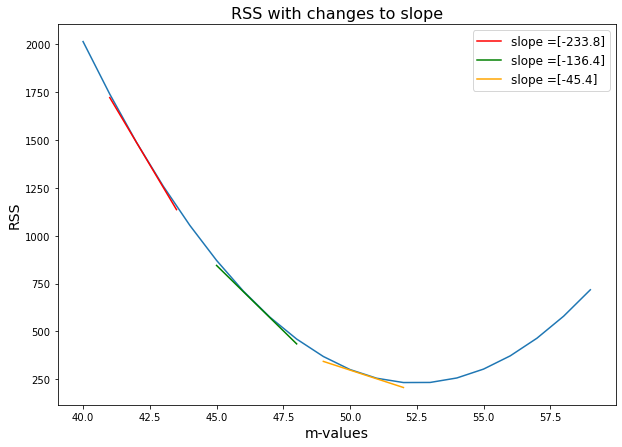

In [6]:
plt.figure(figsize=(10,7))
plt.plot(table[:,0], table[:,1], '-')
plt.plot(x_dev_1, y_dev_1, color = "red",  label = "slope =" + str(fprime_1))
plt.plot(x_dev_2, y_dev_2, color = "green",  label = "slope =" + str(fprime_2))
plt.plot(x_dev_3, y_dev_3, color = "orange", label = "slope =" + str(fprime_3))

plt.xlabel("m-values", fontsize=14)
plt.ylabel("RSS", fontsize=14)
plt.legend(loc='upper right', fontsize='large')

plt.title("RSS with changes to slope", fontsize=16);

### Stepping according to the slope

When you look at the above plot in detail you can see that we added numbers to our slope.  The slope of the curve at any given point is equal to the slope of the tangent line at that point.  By tangent line, we mean the line that just barely touches the curve at that point.  In the above graph, the red, green and orange lines are tangent to our cost curve at the points where $m$ equals 42.25, 46.5, and 50.5, respectively.  The slopes of our tangent lines, and therefore the slopes of the cost curves at those points, are labeled above.  

Let's see how this works.

We use the following procedure to find the ideal $m$: 
1.  Randomly choose a value of $m$, and 
2.  Update $m$ with the formula $ m = (-.02) * slope_{m = i} + m_i$.

The formula above tells us which $m$ value to look at next. We start by choosing a random $m$ value that we can plug into our formula. We take the slope of the curve at that $m$ value and multiply it by $-.02$ then add it to our original $m$ value to produce our next $m$ value.

As we can surmise, the larger the slope, the larger the resulting step to the next $m$ value.

Here's an example.  We randomly choose a $m$ value of 42.  Then:

* $m_{t=0} = 42 $
* $m_{t=1} = (-.02) * -239  + 42 = 4.78 + 42 = 46.78 $
* $m_{t=2} = (-.02) * -129.4 + 46.8 = 2.588 + 46.8 = 49.388 $

* $m_{t=3} = (-.02) * -60.4 + 49.4 = 1.208 + 49.4 = 50.61  $

> Notice that we don't update our values of $m$ by just adding or subtracting the slope at that point.  The reason we multiply the slope by a fraction like .02 is so that we avoid the risk of overshooting the minimum.  This fraction is called the **learning rate**.  Here, the fraction is negative because we always want to move in the opposite direction of the slope. When the slope of the cost curve points downwards, we want to move to a higher $m$ slope for our linear regression problem. Conversely, when we are on the right side of the curve and the slope is rising, we want to move backwards to a lower y-intercept.

This technique is pretty magical.  By looking at the tangent line at each point, we no longer are  changing our $m$ value and just hoping that it has the correct impact on our RSS.  This is because, for one, the slope of the tangent line points us in the right direction.  And as you can see above, our technique properly adjusts the amount to change the $m$ value without even knowing the ideal $m$ value.  When our $m$ was far away from the ideal $m$ value, our formula increased $m$ by almost 5. By the third step, we were updating our $m$ value by only 1.2 because we were closer to the ideal slope for minimizing the RSS.  

## Summary

We started this section by saying that we wanted a technique to find a $m$ value that would minimize our RSS, given a value of $b$.  We did not want to simply try all of the values of $m$ as doing so would be inefficient.  Instead, we went with the approach of gradient descent, where we try variations of regression lines iteratively changing our $m$ variable and assessing our RSS to see if we are making progress.

In this lesson, we focused in on how to know which direction to alter a given variable, $m$ or $b$, as well as a technique for determining the size of the change to apply to one of our variables.  We used the line tangent to our cost curve at a given point to indicate the direction and size of the update to $m$.  The further away, the steeper the curve and thus the larger the step we would want to take.  Appropriately, our tangent line slope would have us take a larger step.  And the closer we are to the ideal $b$ value, the flatter the tangent line to the curve, and the smaller a step we would take. 